# Learning To Program Cellular Automata With Jax
> A tutorial of fastpages for Jupyter notebooks.

- toc: true 
- badges: true
- comments: true
- categories: [jupyter]
- image: images/chart-preview.png

In [10]:
!pip install pypng

     |████████████████████████████████| 655kB 2.8MB/s 
  Created wheel for pypng: filename=pypng-0.0.20-cp36-none-any.whl size=67161 sha256=006a66b44bd233d6a40cc47b6738b755c4513aa7f8f1952d3cd06d802eea73b7
  Stored in directory: /root/.cache/pip/wheels/41/6b/ef/0493b536b6d4722c2ae9486691b1d49b922b9877922beeabb3
Successfully built pypng


In [52]:
import base64

import png
import io
import numpy as np
import png
def png_bytes(a):
    output = io.BytesIO()
    b = (1 - a)
    png.from_array((b*255).astype(np.uint8), 'L').write(output)
    return output.getvalue()

def data_url(x):
  return (b'data:image/png;base64,'+base64.b64encode(png_bytes(x))).decode("utf-8")      

In [176]:
import altair as alt
import pandas as pd

source = pd.DataFrame.from_records([
      {"x": 0.0, "y": 0.0, "img": data_url(np.identity(128))},
      {"x": 128.0, "y": 0.0, "img": data_url(np.ones([128,128]) * 0.5)},
      {"x": 256.0, "y": 0.0, "img": data_url(np.identity(128))},
      {"x": 128*3, "y": 0.0, "img": data_url(np.identity(128))}
])

i1 = alt.Chart(source).mark_image(
    align="left",
    baseline="top",
    width=128,
    height=128,
    clip=True
).encode(
    alt.X('x', 
          axis=None,
          #axis=alt.Axis(values=[0, 128,256,128*3,128*4]), 
          scale=alt.Scale(type='linear', domain=[0, 128*4])),
    alt.Y('y',axis=None),
    url='img'
     
)

In [177]:
from IPython.display import SVG

svgjoy=b"""
<svg width="300" height="200">
<svg y="0"><text dominant-baseline="text-after-edge" font-size="20px" x="0" y="20">jMyg</text></svg>
<svg y="20"><image width="128" image-rendering="pixelated" height="128" x="0" y="0" href=
"""+\
dataurl+\
b"""
/></svg>

</svg>"""

display( SVG(svgjoy) )

import svgwrite
from svgwrite import rgb


dataurl = (b'data:image/png;base64,'+base64.b64encode(png_bytes(np.identity(128)))).decode("utf-8")
mysvg = svgwrite.Drawing( size=(300 ,300) )
mysvg.add(mysvg.image(x=0,y=30,href=dataurl))
mysvg.add(mysvg.image(x=0+128,y=30,href=dataurl))
mysvg.add(mysvg.text("some text", text_anchor="middle", insert=(64,30),font_size=12,dominant_baseline="text-after-edge" ))
mysvg.add(mysvg.text("some longer text", text_anchor="middle", insert=(128+64,30),font_size=12, dominant_baseline="text-after-edge" ))
display(SVG(mysvg.tostring()))

384

alt.Chart(...)
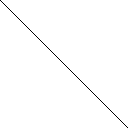
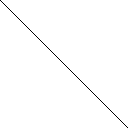
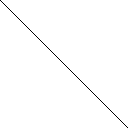

In [182]:
(i1).configure_axis(
    grid=False
).configure_view(
    strokeWidth=0
).properties(
    width=128*4,
    #height=128*1,
    padding=0
)

In [180]:
alt.renderers.enable("colab", embed_options={'renderer': 'svg'})


RendererRegistry.enable('colab')

alt.LayerChart(...)
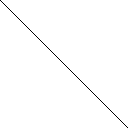
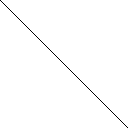

In [121]:
(i1+i2).configure_axis(
    grid=False
).configure_view(
    strokeWidth=2
).properties(
    width=128*3+100,
    height=128*1,
    padding=0
)

alt.LayerChart(...)
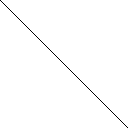
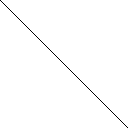

In [115]:
(i1+i2).configure_axis(
    grid=False
).configure_view(
    strokeWidth=0
).properties(
    width=128*3+15,
    height=128*1,
    padding=0
)